# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [1]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,-0.160928,-0.424538,-0.467283,1.181630,0.936454,-25.937869
1,0.447686,2.003379,-0.157866,0.379671,-0.814639,91.377434
2,1.011374,-0.584206,-1.259004,0.335182,-0.432066,86.994903
3,1.937466,-0.722717,-0.108190,-0.392765,-0.096026,175.919929
4,-0.201197,1.451544,-0.079381,0.582290,0.597266,13.904152


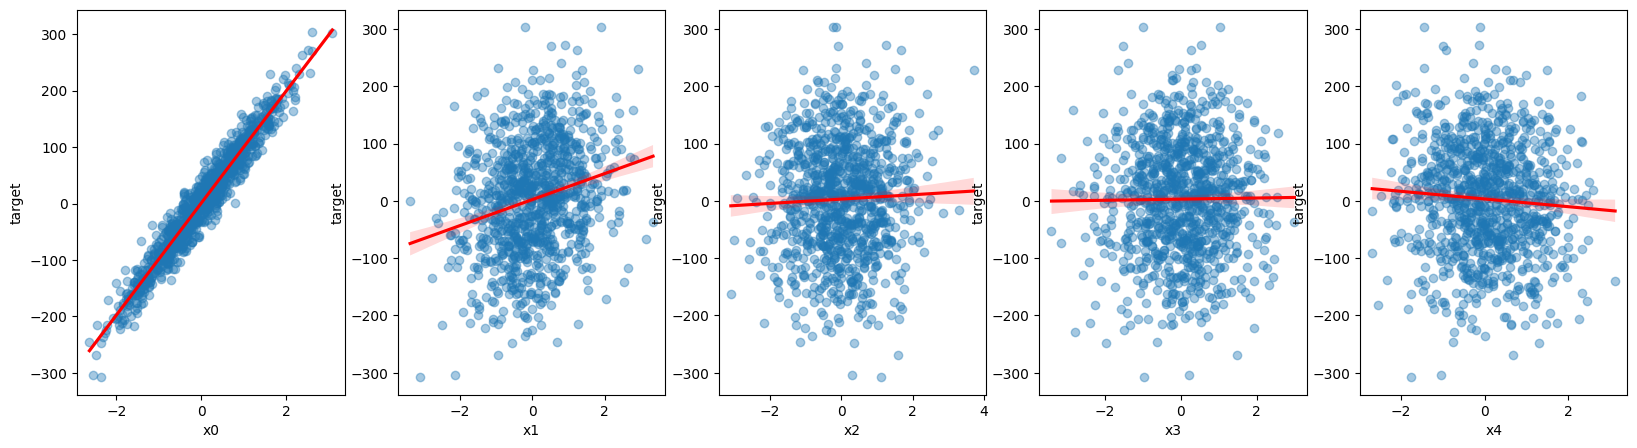

In [4]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)
    


Ahora agregamos _outliers_ a un nuevo dataset

In [5]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)

In [6]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

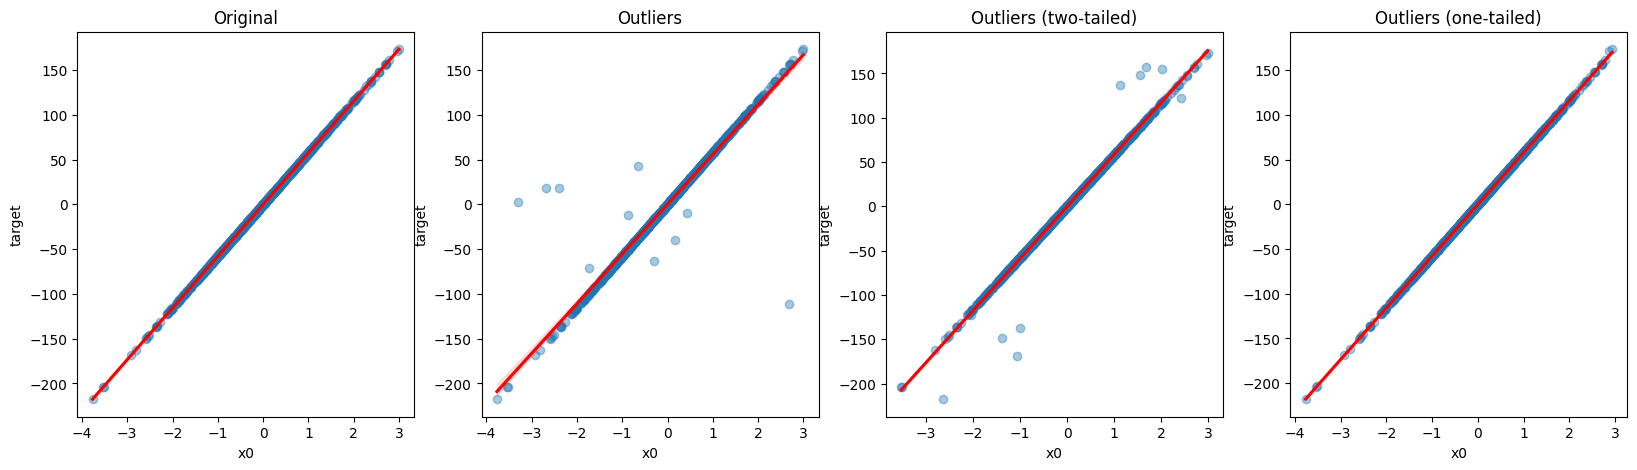

In [7]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

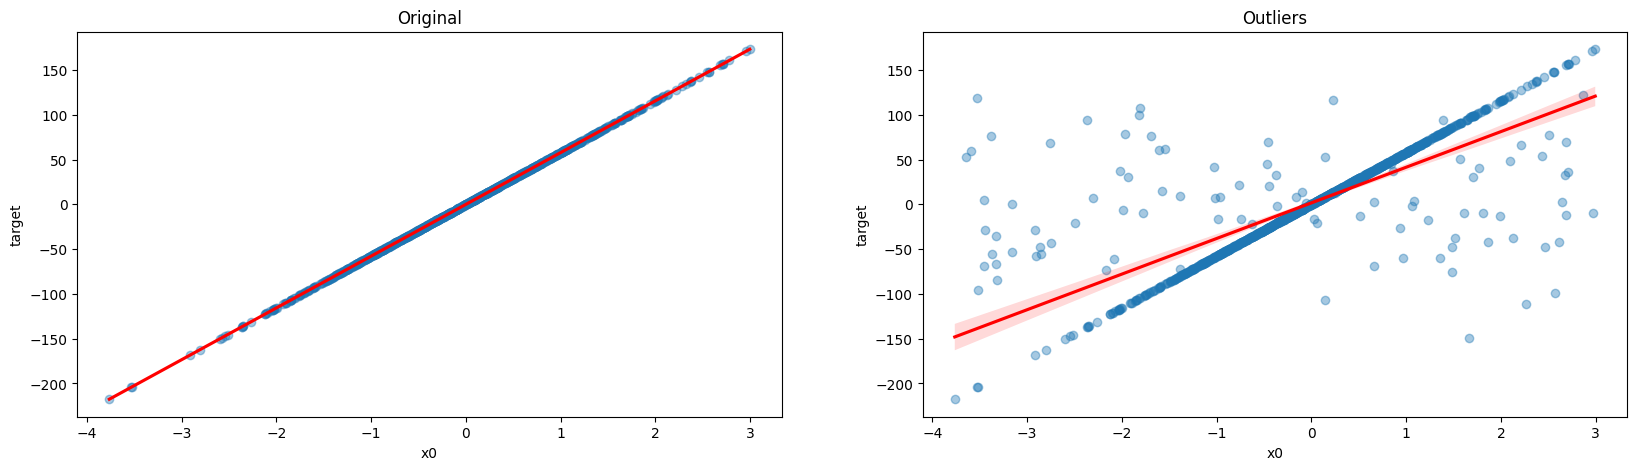

In [8]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [9]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
## Parámetros de la simulación
n_exp = 100
n_samples = 1000
n_features = 10
n_informative = 2
n_targets = 1
random_state_values = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

noise_values = np.linspace(0, 10, 100)
bias_values = np.linspace(0, 10, 20)

In [11]:
mean_squared_error_list = []
mean_absolute_error_list = []
noise_list = []
bias_list = []
coef_list = {}

for i in range(100):
    noise_val=random.choice(noise_values)
    bias_val=random.choice(bias_values)
    
    data = generate_dataset(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_targets=n_targets,
        random_state=random.choice(random_state_values),
        noise=noise_val,
        bias=bias_val,
        output='dataframe'
    )

    X = data.iloc[:, :-1].values
    # We can edit de array to re analize the new coef distribution
    # X = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
    y = data.iloc[:, 10].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                        random_state=random.choice(random_state_values), shuffle=True)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(X = X_train, y = y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # Create an dictionary of arrays for every variable coef
    for j in range(0, len(regr.coef_), 1):
        # To init de array
        if i == 0:
            coef_list[j] = []
        coef_list[j].append(regr.coef_[j])
    noise_list.append(noise_val)
    bias_list.append(bias_val)
    mean_squared_error_list.append(mean_squared_error(y_test, y_pred))
    mean_absolute_error_list.append(mean_absolute_error(y_test, y_pred))

data_output = dict(noise=noise_list, bias=bias_list,
                   coef_x0=coef_list[0], coef_x1=coef_list[1], coef_x2=coef_list[2], coef_x3=coef_list[3], coef_x4=coef_list[4],
                   coef_x5=coef_list[5], coef_x6=coef_list[6], coef_x7=coef_list[7], coef_x8=coef_list[8], coef_x9=coef_list[9],
                   mse=mean_squared_error_list, mae=mean_absolute_error_list)
data_frame_output = pd.DataFrame(data_output)

data_frame_output

,noise,bias,coef_x0,coef_x1,coef_x2,coef_x3,coef_x4,coef_x5,coef_x6,coef_x7,coef_x8,coef_x9,mse,mae
0,3.232323,0.000000,32.095042,10.356915,-0.008429,-0.106652,-0.060956,0.150217,-0.076249,-0.104903,0.025029,0.028406,8.946307,2.360327
1,4.343434,5.263158,39.246011,58.633219,-0.206762,-0.238053,0.138153,0.285264,0.238055,0.062959,-0.207486,0.270659,19.105306,3.538394
2,7.979798,8.421053,70.529472,68.746526,-0.042418,-0.337126,-0.258278,0.359431,0.314899,0.088693,0.000356,-0.088793,68.793887,6.760812
3,5.454545,3.684211,39.345858,58.795710,-0.350562,-0.261129,-0.010386,0.091250,0.352921,0.175561,-0.208769,0.027456,30.966286,4.558552
4,9.494949,5.789474,60.981626,72.438627,-0.060656,0.277436,-0.183706,-0.542330,-0.434226,0.127277,-0.075752,0.009923,88.461948,7.455806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.080808,4.736842,10.688186,91.430587,-0.016709,0.040653,-0.323660,0.357495,0.207323,0.207323,0.141407,0.088847,75.853877,7.148018
96,5.555556,10.000000,11.975960,10.007018,-0.203364,-0.081884,0.167708,-0.093975,0.105075,-0.087017,0.065565,0.334015,33.388145,4.547839
97,8.989899,0.526316,70.546397,68.729922,-0.047788,-0.379800,-0.290972,0.404929,0.354760,0.099920,0.000401,-0.100033,87.312351,7.616611
98,3.535354,8.421053,12.033403,10.279030,-0.108035,-0.106858,0.091854,-0.004558,-0.025857,-0.086596,0.038125,0.213469,11.348980,2.706322


Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
Si, se realizaron pruebas sacando las variables con la línea:

X = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

A medida que se sacaban las variables el % de los coef mejoró

### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

percentage 1%
huber:  0.997823749674891
LinearRegression
coef:  [18.42612853]
mean_squared_error:  0.12269867745250915
mean_absolute_error:  0.3342942769449002

percentage 100%
huber:  0.4248500198823073
LinearRegression
coef:  [18.42612853]
mean_squared_error:  458.17408688626307
mean_absolute_error:  15.250021571393395



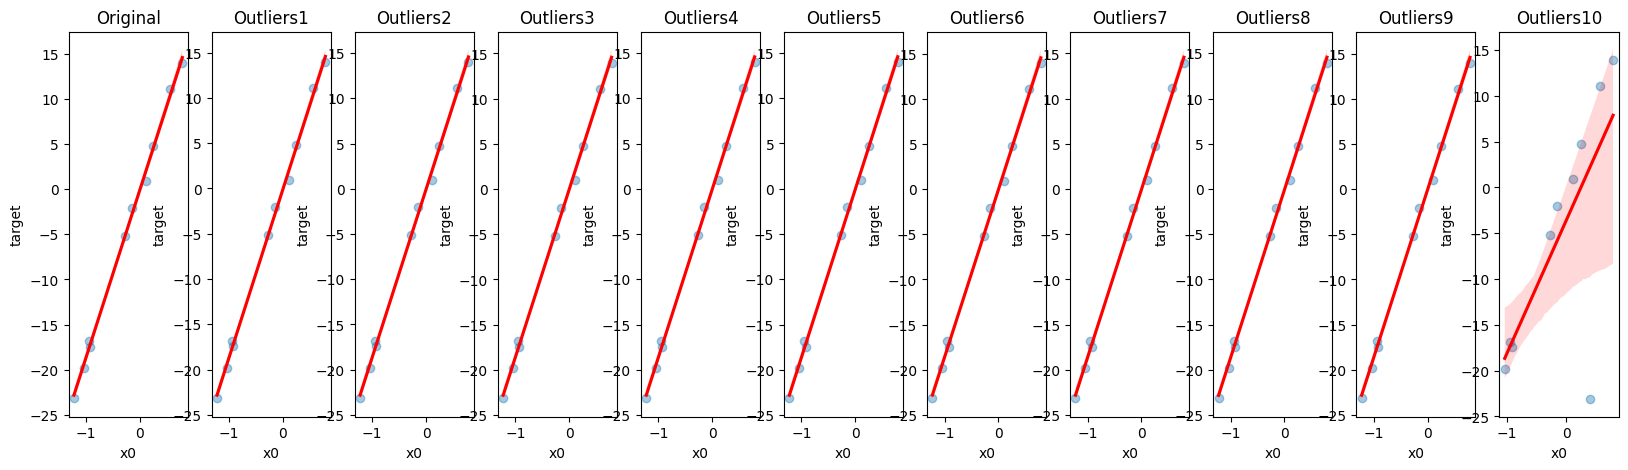

In [12]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV

dataset = generate_dataset(
        n_samples=10,
        n_features=1,
        n_targets=1,
        random_state=random.choice(random_state_values),
        noise=0.5,
        bias=0,
        output='dataframe'
    )

data_frame_outliers_list = []
for i in range(0, 10, 1):
    percentage_val = (i + 1) / 100
    data_frame_outliers = generate_outliers(
        df=dataset,
        columns=['x0'],
        percentage=percentage_val,
        extreme_outliers=False,
        only_tails=False,
    )
    data_frame_outliers_list.append(data_frame_outliers)

fig, axes = plt.subplots(1, 11, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=dataset,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

for i in range(1, 11, 1):
    title = 'Outliers' + str(i)
    sns.regplot(x='x0',
            y='target',
            data=data_frame_outliers_list[i-1],
            ax=axes[i],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
    axes[i].set_title(title)

def applyRegresions(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)
    huber = HuberRegressor().fit(X = X_train, y = y_train)
    print("huber: ", huber.score(X, y))
    print("LinearRegression")
    regr = linear_model.LinearRegression()
    regr.fit(X = X_train, y = y_train)
    y_pred = regr.predict(X_test)
    print("coef: ", regr.coef_)
    print("mean_squared_error: ", mean_squared_error(y_test, y_pred))
    print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))
    print("")

print("percentage 1%")
applyRegresions(data_frame_outliers_list[0].iloc[:, :-1].values, data_frame_outliers_list[0].iloc[:, 1].values)
print("percentage 100%")
applyRegresions(data_frame_outliers_list[9].iloc[:, :-1].values, data_frame_outliers_list[9].iloc[:, 1].values)


## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [13]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [16]:
def GD(epoch_values, X, y, random_state, theta, tolerance):
    for epoch in range(epoch_values):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                        random_state=random_state, shuffle=True)
        grad = gradient(X_train, y_train, theta)
        theta = (theta - 0.01) * grad

        regr = linear_model.LinearRegression()
        regr.fit(X = X_train, y = y_train)
        y_pred = regr.predict(X_test)
        print("grad: ", grad)
        print("coef: ", regr.coef_)
        print("mean_squared_error: ", mean_squared_error(y_test, y_pred))
        print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))
        if (theta < tolerance):
            print("")
            print("break by theta: ", theta)
            break
        print("")

dataset = generate_dataset(
        n_samples=100,
        n_features=1,
        n_targets=1,
        random_state=0,
        noise=0.5,
        bias=0,
        output='dataframe'
    )

data_frame_outliers = generate_outliers(
        df=dataset,
        columns=['x0'],
        percentage=0.5,
        extreme_outliers=False,
        only_tails=False,
    )

X = data_frame_outliers.iloc[:, :-1].values
y = data_frame_outliers.iloc[:, 1].values
GD(5, X, y, random.choice(random_state_values), np.linspace(0, 1, 1), 0.01)


grad:  [-50.24178345]
coef:  [18.3027456]
mean_squared_error:  1275.853992223513
mean_absolute_error:  28.4673646547364

grad:  [-48.8390917]
coef:  [18.3027456]
mean_squared_error:  1275.853992223513
mean_absolute_error:  28.4673646547364

break by theta:  [-24.04923977]


#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [17]:
def SGD(epoch_values, X, y, random_state, theta):
    for epoch in range(epoch_values):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                        random_state=random_state, shuffle=True)
        grad = gradient(X_train, y_train, theta)
        theta = (theta - 0.01) * grad

        regr = linear_model.LinearRegression()
        regr.fit(X = X_train, y = y_train)
        y_pred = regr.predict(X_test)
        print("grad: ", grad)
        print("coef: ", regr.coef_)
        print("mean_squared_error: ", mean_squared_error(y_test, y_pred))
        print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))
        print("")

dataset = generate_dataset(
        n_samples=100,
        n_features=1,
        n_targets=1,
        random_state=0,
        noise=0.5,
        bias=0,
        output='dataframe'
    )

data_frame_outliers = generate_outliers(
        df=dataset,
        columns=['x0'],
        percentage=0.5,
        extreme_outliers=False,
        only_tails=False,
    )

X = data_frame_outliers.iloc[:, :-1].values
y = data_frame_outliers.iloc[:, 1].values
SGD(5, X, y, random.choice(random_state_values), np.linspace(0, 1, 1))


grad:  [-30.46447]
coef:  [13.93992636]
mean_squared_error:  1654.3935814690108
mean_absolute_error:  34.61446565357629

grad:  [-29.79963446]
coef:  [13.93992636]
mean_squared_error:  1654.3935814690108
mean_absolute_error:  34.61446565357629

grad:  [-49.62599947]
coef:  [13.93992636]
mean_squared_error:  1654.3935814690108
mean_absolute_error:  34.61446565357629

grad:  [921.52858494]
coef:  [13.93992636]
mean_squared_error:  1654.3935814690108
mean_absolute_error:  34.61446565357629

grad:  [877238.23752378]
coef:  [13.93992636]
mean_squared_error:  1654.3935814690108
mean_absolute_error:  34.61446565357629



Análisis

En base a los resultados podemos ver que SDG aumentó su valor más rapidamente, a su vez, MSE y MAE dieron valores más altos para el modelo estocastico. Se entiende que en cada iteración aumenta el contexto de overfitting.

### Ejercicio 7

TBD